In [25]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [26]:
#import data set
df = pd.read_csv(r'/content/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# data exploration
df.info(),df.describe(),df.describe(include ='object'),df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


(None,
               year        score         votes        budget         gross  \
 count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
 mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
 std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
 min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
 25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
 50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
 75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
 max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   
 
            runtime  
 count  7664.000000  
 mean    107.261613  
 std      18.581247  
 min      55.000000  
 25%      95.000000  
 50%     104.000000  
 75%     116.000000  
 max     366.000000  ,
                  name rating   genre                           released  \
 count        

In [27]:
# percentage of data missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}- {}%'.format(col,pct_missing)) # or print(f'{col}- {pct_missing}%')
# verify if missing values were to be included

name- 0.0%
rating- 0.010041731872717789%
genre- 0.0%
year- 0.0%
released- 0.0002608242044861763%
score- 0.0003912363067292645%
votes- 0.0003912363067292645%
director- 0.0%
writer- 0.0003912363067292645%
star- 0.00013041210224308815%
country- 0.0003912363067292645%
budget- 0.2831246739697444%
gross- 0.02464788732394366%
company- 0.002217005738132499%
runtime- 0.0005216484089723526%


In [28]:
# function to clean the dataset
def clean_movies_df(df):
    # Fill categorical columns(rating & company) with 'Unknown'
    df['rating'].fillna('Unknown', inplace=True)
    df['company'].fillna('Unknown', inplace=True)

    # Fill numerical columns with mean values
    df['score'].fillna(df['score'].mean(), inplace=True)
    df['votes'].fillna(df['votes'].mean(), inplace=True)
    df['budget'].fillna(df['budget'].mean(), inplace=True)
    df['gross'].fillna(df['gross'].mean(), inplace=True)
    df['runtime'].fillna(df['runtime'].mean(), inplace=True)

    # Fill remaining categorical columns with mode values
    df['released'].fillna(df['released'].mode()[0], inplace=True)
    df['writer'].fillna(df['writer'].mode()[0], inplace=True)
    df['star'].fillna(df['star'].mode()[0], inplace=True)
    df['country'].fillna(df['country'].mode()[0], inplace=True)

    return df

# Clean the dataset
df = clean_movies_df(df)

# Verify the cleaning process
df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


(None,
 name        0
 rating      0
 genre       0
 year        0
 released    0
 score       0
 votes       0
 director    0
 writer      0
 star        0
 country     0
 budget      0
 gross       0
 company     0
 runtime     0
 dtype: int64)

In [29]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [30]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [31]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [32]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

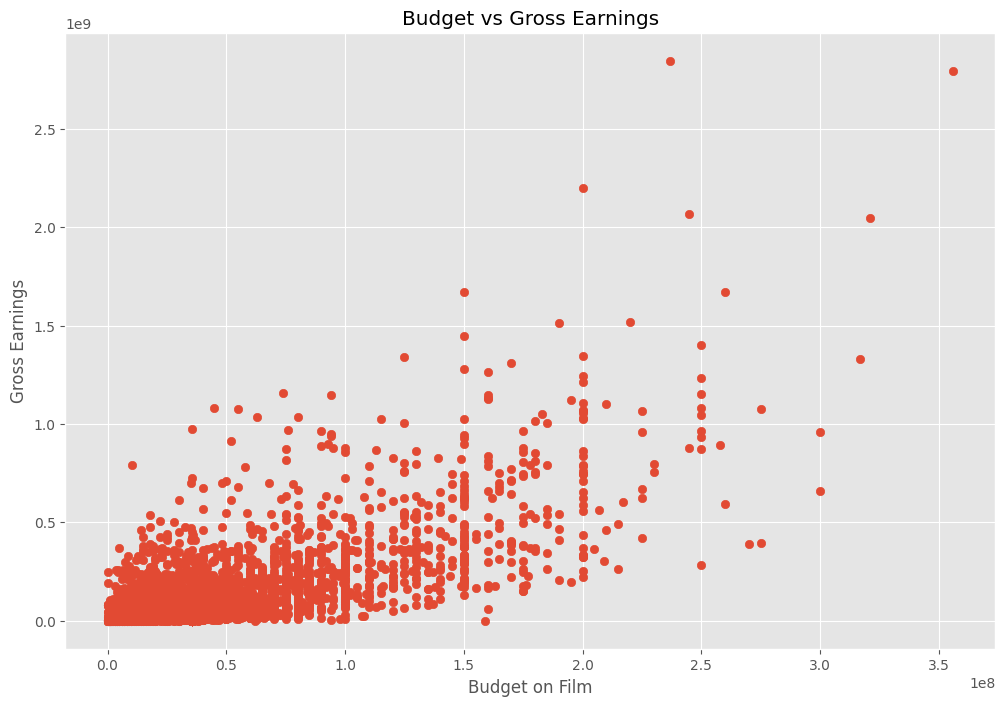

In [11]:
# scatter plot (to check the correlation between Budget and Gross earnings)
plt.scatter(x = df['budget'],y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget on Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

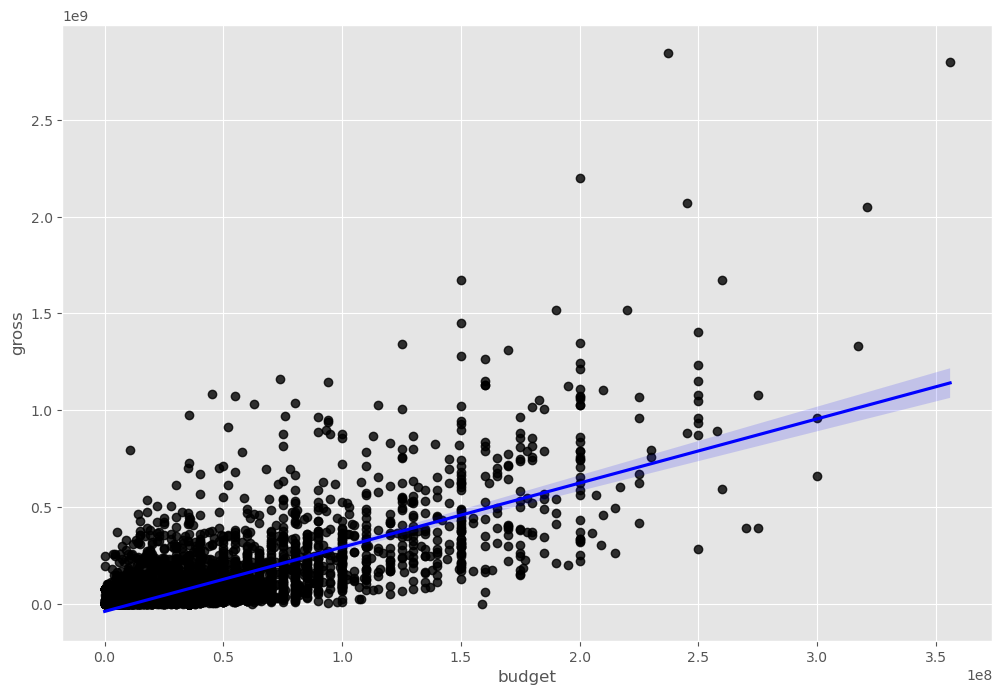

In [ ]:
# regplot with seaborne
sns.regplot(x='budget',y='gross',data =df,scatter_kws = {'color':'black'}, line_kws= {'color':'blue'})

In [ ]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [20]:
pd.set_option('display.max_rows',None)

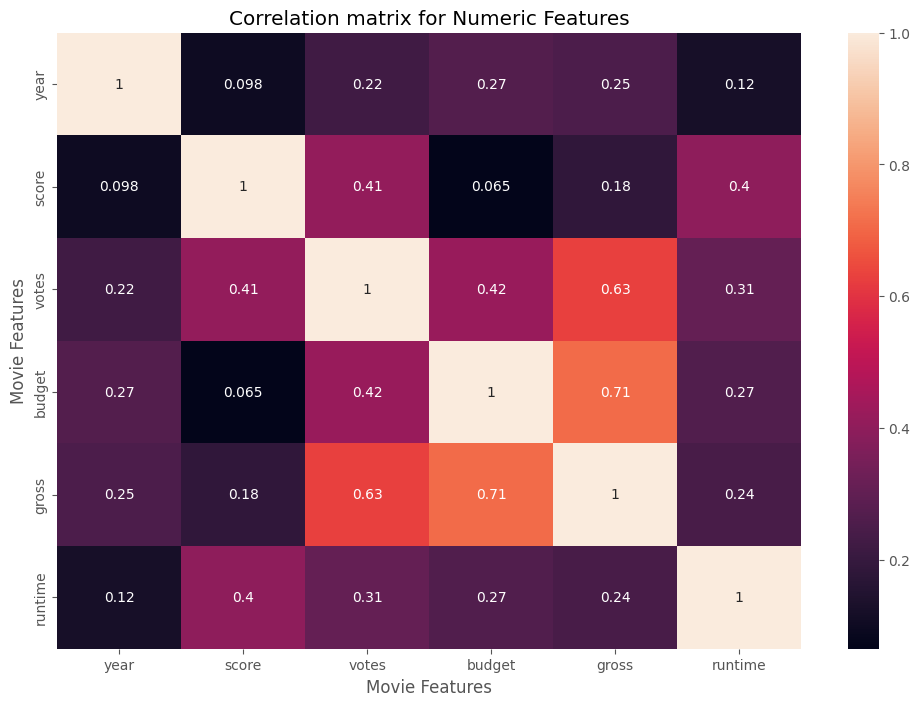

In [12]:
# correlation values
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr(method= 'pearson')
sns.heatmap(correlation_matrix,annot =True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
# Correlation considering the non- numeric columns
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [35]:
df_numerized = df
for column in df_numerized.columns:
    if (df_numerized[column].dtype =="object"):
        df_numerized[column] = df_numerized[column].astype('category')
        df_numerized[column]= df_numerized[column].cat.codes

df_numerized.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


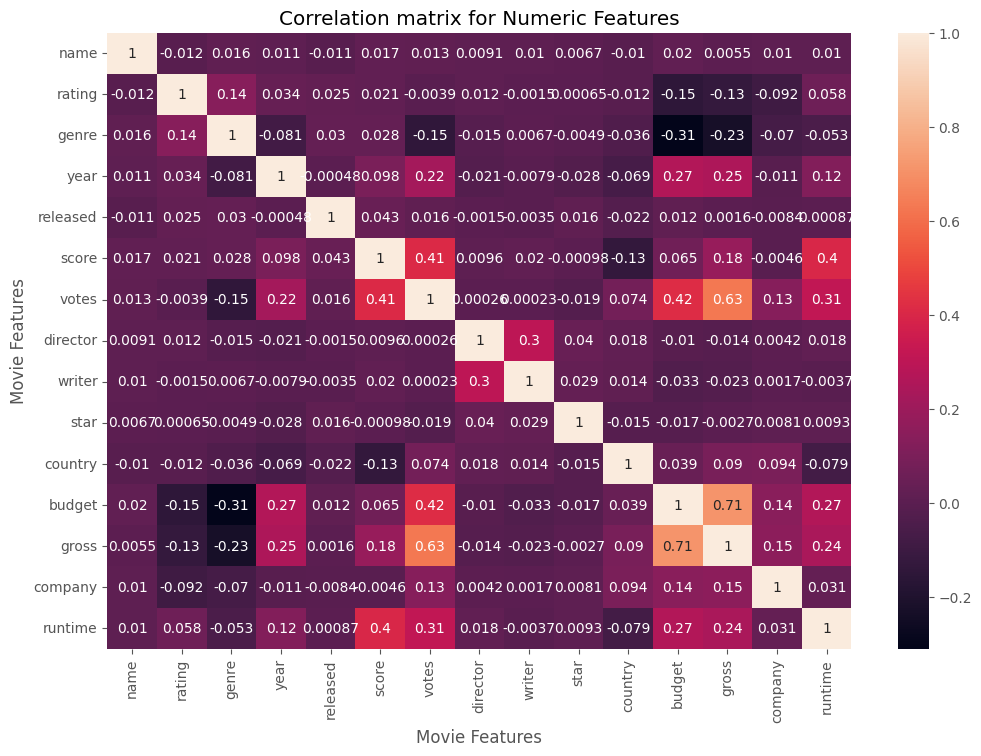

In [36]:
correlation_matrix2 = df_numerized.corr(method= 'pearson')
sns.heatmap(correlation_matrix2,annot =True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [37]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012206,0.016355,0.011453,-0.011087,0.017095,0.013086,0.009079,0.010018,0.006749,-0.010425,0.020368,0.005466,0.010373,0.010390
rating,-0.012206,1.000000,0.136127,0.033801,0.025152,0.020968,-0.003862,0.011951,-0.001526,0.000649,-0.011929,-0.150081,-0.127190,-0.092284,0.058132
genre,0.016355,0.136127,1.000000,-0.081261,0.029997,0.027959,-0.145276,-0.015258,0.006746,-0.004856,-0.035896,-0.310566,-0.230267,-0.070032,-0.052699
year,0.011453,0.033801,-0.081261,1.000000,-0.000484,0.097936,0.222810,-0.020795,-0.007901,-0.027745,-0.069423,0.265578,0.252042,-0.011425,0.120766
released,-0.011087,0.025152,0.029997,-0.000484,1.000000,0.042617,0.016114,-0.001492,-0.003461,0.015550,-0.022042,0.012267,0.001637,-0.008427,0.000867
score,0.017095,0.020968,0.027959,0.097936,0.042617,1.000000,0.409182,0.009559,0.019795,-0.000979,-0.134577,0.064541,0.182868,-0.004584,0.399329
votes,0.013086,-0.003862,-0.145276,0.222810,0.016114,0.409182,1.000000,0.000260,0.000232,-0.019452,0.073582,0.421007,0.628713,0.130659,0.309166
director,0.009079,0.011951,-0.015258,-0.020795,-0.001492,0.009559,0.000260,1.000000,0.299512,0.039715,0.017926,-0.010364,-0.014272,0.004248,0.017624
writer,0.010018,-0.001526,0.006746,-0.007901,-0.003461,0.019795,0.000232,0.299512,1.000000,0.028745,0.014409,-0.033217,-0.023186,0.001663,-0.003698
star,0.006749,0.000649,-0.004856,-0.027745,0.015550,-0.000979,-0.019452,0.039715,0.028745,1.000000,-0.014749,-0.016952,-0.002683,0.008063,0.009273


In [38]:
# unstacking to see the ones with the highest correlations easier;
correlation_matrix3 =  df_numerized.corr()
corrpairs = correlation_matrix3.unstack()
corrpairs

name      name        1.000000
          rating     -0.012206
          genre       0.016355
          year        0.011453
          released   -0.011087
          score       0.017095
          votes       0.013086
          director    0.009079
          writer      0.010018
          star        0.006749
          country    -0.010425
          budget      0.020368
          gross       0.005466
          company     0.010373
          runtime     0.010390
rating    name       -0.012206
          rating      1.000000
          genre       0.136127
          year        0.033801
          released    0.025152
          score       0.020968
          votes      -0.003862
          director    0.011951
          writer     -0.001526
          star        0.000649
          country    -0.011929
          budget     -0.150081
          gross      -0.127190
          company    -0.092284
          runtime     0.058132
genre     name        0.016355
          rating      0.136127
        

In [22]:
sorted_pairs = corrpairs.sort_values()
sorted_pairs

budget    genre      -0.310566
genre     budget     -0.310566
gross     genre      -0.230267
genre     gross      -0.230267
budget    rating     -0.150081
rating    budget     -0.150081
votes     genre      -0.145276
genre     votes      -0.145276
country   score      -0.134577
score     country    -0.134577
gross     rating     -0.127190
rating    gross      -0.127190
          company    -0.092284
company   rating     -0.092284
year      genre      -0.081261
genre     year       -0.081261
runtime   country    -0.079265
country   runtime    -0.079265
genre     company    -0.070032
company   genre      -0.070032
year      country    -0.069423
country   year       -0.069423
runtime   genre      -0.052699
genre     runtime    -0.052699
country   genre      -0.035896
genre     country    -0.035896
budget    writer     -0.033217
writer    budget     -0.033217
star      year       -0.027745
year      star       -0.027745
gross     writer     -0.023186
writer    gross      -0.023186
country 

In [23]:
high_correlation = sorted_pairs[(sorted_pairs)> 0.5]

votes     gross       0.628713
gross     votes       0.628713
          budget      0.711270
budget    gross       0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

votes and budget have the highest correlation on gross earnings of the movie companies